Linked Structures
=================



## Agenda



1.  Motives
2.  Objectives
3.  Mechanisms
4.  Linked Data Structures



## 1.  Motives



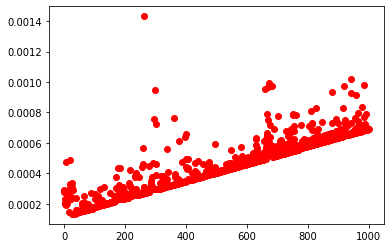

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from timeit import timeit

def time_array_front_insert_delete(n):
    return timeit('lst.insert(0, None) ; del lst[0]',
                  'lst = list(range({}))'.format(n),
                  number=1000)

ns = np.linspace(0, 1000, 1000)
plt.plot(ns, [time_array_front_insert_delete(int(n)) for n in ns], 'ro')
plt.show()

### Worst case delete from beginning -> linear

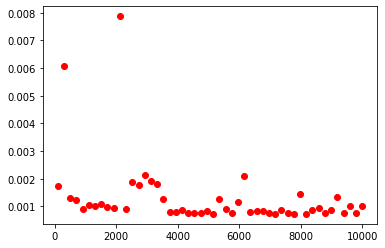

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from timeit import timeit

def time_array_front_insert_delete(n): ### broken :(
    return timeit('lst.append(None) ; del lst[{} - 1]'.format(n), 'lst = list(range({}))'.format(n), number = 10000)

ns = np.linspace(100, 10000, 50)
plt.plot(ns, [time_array_front_insert_delete(int(n)) for n in ns], 'ro')
plt.show()

### delete from end -> constant

In [9]:
# consider:

# contact is linear

def concatenate(arr1, arr2):
    """Concatenates the contents of arr1 and arr2 as efficiently (time-wise)
    as possible, so that the resulting structure can be used to index all
    combined elements (arr1's followed by arr2's)."""
    pass

def concat1(arr1, arr2):
    # O()
    for x in arr2:
        arr1.append(x)
    return arr1

def concat2(arr1, arr2):
    # O()
    arr1.extend(arr2)
    return arr1

def concat3(arr1, arr2):
    # O()
    return arr1 + arr2

## 1.  Objectives



We would like a new data storage mechanism for constructing data
structures that:

-   does not require monolithic, contiguous memory allocation,
-   allows individual elements to be flexibly and efficiently reorganized,
-   and preserves the ability to locate (e.g., via position) and iterate

over elements



## 1.  Mechanisms



### 3.1. Two-Element Lists



In [26]:
# data items
i1 = 'lions'
i2 = 'tigers'
i3 = 'bears'
i4 = 'oh, my'
[i1, i2, i3, i4]

['lions', 'tigers', 'bears', 'oh, my']

In [88]:
# creating individual "links" -> [data, next_element]
l4 = [i4, None]
l3 = [i3, l4]
l2 = [i2, l3]
l1 = [i1, l2]

### link-ing them together

In [89]:
def print_list(head):
    cur = head
    while cur != None:
        print(cur[0])
        cur = cur[1]

In [95]:
# prepending
i0 = 'walruses'
l0 = [i0, l1]
head = l0
print_list(head)

def prepend_list(head, el): # O(1)
    newcell = [el, head] # 1
    return newcell # 1

walruses
lions
tigers
bears
oh, my


In [96]:
# finding an element

def get_list(head, pos):
    cur = head
    for i in range(0, pos):
        cur = cur[1]
        if not cur[1]:
            raise Exception("Index out of range")
    return cur[0]

get_list(l1, 0)

'lions'

In [81]:
# insertion
def insert_list(head, pos, el):
    cur = head
    for i in range(0, pos): # 1
        cur = cur[1]       # O(n)
        if not cur[1]:      # O(n)
            raise Exception("Index out of range") # O(1)
    newel = [el, cur[1]]    # 1
    cur[1] = newel          # 1

i2_5 = 'elephants'
insert_list(l0, 0, i2_5)
print_list(l0)

# look up is now O(n), but we fixed the issue of deletion in array lists

Exception: Index out of range

In [97]:
# find
def get_cell(head, pos):
    cur = head
    for i in range(0, pos): # 1
        cur = cur[1]       # O(n)
        if not cur[1]:      # O(n)
            raise Exception("Index out of range")
    return cur

# deletion
def delete_list(head, pos):
    cur = get_cell(head, pos-1)
    nxt = cur[1]
    cur[1] = nxt[1]

delete_list(l0, 3)
print_list(head)

walruses
lions
tigers
oh, my


### 3.2. "Link" objects



In [124]:
class Link:
    def __init__(self, val, next=None):
        self.val = val
        self.next = next

    def __repr__(self):
        nextrep = "None" if not self.next else self.next.__repr__()
        return f"Link({self.val.__repr__()}, {nextrep})"

In [125]:
#manually constructing a list
head = Link('lion', Link('bear', Link('fleas', None)))
print(head)

Link('lion', Link('bear', Link('fleas', None)))


In [126]:
# prepending

def prepend(l, val):
    return Link(val, l)

In [127]:
l = None
for x in range(10):
    l = prepend(l, x)

In [135]:
# iterator

def link_iterator(l):
    cur = l
    while cur.next != None:
        yield cur.val
        cur = cur.next

In [136]:
for x in link_iterator(l):
    print(x)

9
8
7
6
5
4
3
2
1


In [142]:
# iteration based on a recursive pattern

def link_iterator_rec(l):
    if l:
        yield l.val
        for val in link_iterator_rec(l.next):
            yield val

In [143]:
for x in link_iterator_rec(l):
    print(x)

9
8
7
6
5
4
3
2
1
0


## 1.  Linked Data Structures



### 4.1 Linked List



In [152]:
class LinkedList:
    class Link:
        def __init__(self, val, next=None):
            self.val = val
            self.next = next

    def __init__(self):
        self.head = None

    def __len__(self):
        cur = self.head
        length = 0
        while cur != None:
            cur = cur.next
            length += 1
        return length

    def normalize_index(i):
        # add checks
        if i < 0:
            len(self) + i
        return i

    def prepend(self, val):
        self.head = Link(val, self.head)

    def __getitem__(self, index):
        return self.find_link(index).val

    def __setitem__(self, inx, val):
        cur = self.find_link(idx)
        cur.val = val

    def find_link(self, pos):
        cur = self.head
        for i in range(0, index):
            cur = cur.next
            if not cur[1]:
                raise Exception("Index out of range")
        return cur

    def __iter__(self):
        cur = self.head
        while cur != None:
            yield cur.val
            cur = cur.next

    def __repr__(self):
        return '[' + ', '.join(str(x) for x in self) + ']'

In [148]:
l = LinkedList()
for x in range(10):
    l.prepend(x)
l

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

### 4.2 Binary Tree



In [1]:
class BinaryLink:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [1]:
# manual construction of a "tree" representing the expression ((5+3)*(8-4))
t = BinaryLink('*')
t.left = BinaryLink('+')
t.left.left  = BinaryLink('5')
t.left.right = BinaryLink('3')
t.right = BinaryLink('-')
t.right.left  = BinaryLink('8')
t.right.right = BinaryLink('4')

In [1]:
def print_expr_tree(t):
    if t:
        if not t.val.isdigit():
            print('(', end='')
        print_expr_tree(t.left)
        print(t.val, end='')
        print_expr_tree(t.right)
        if not t.val.isdigit():
            print(')', end='')

In [1]:
print_expr_tree(t)

### 4.3 N-ary Tree



In [1]:
class NaryLink:
    def __init__(self, val, n=2):
        self.val = val
        self.children = [None] * n

    def __getitem__(self, idx):
        return self.children[idx]

    def __setitem__(self, idx, val):
        self.children[idx] = val

    def __iter__(self):
        for c in self.children:
            yield c

In [1]:
root = NaryLink('Kingdoms', n=5)

root[0] = NaryLink('Animalia', n=35)
root[1] = NaryLink('Plantae', n=12)
root[2] = NaryLink('Fungi', n=7)
root[3] = NaryLink('Protista', n=5)
root[4] = NaryLink('Monera', n=5)

root[2][0] = NaryLink('Chytridiomycota')
root[2][1] = NaryLink('Blastocladiomycota')
root[2][2] = NaryLink('Glomeromycota')
root[2][3] = NaryLink('Ascomycota')
root[2][4] = NaryLink('Basidiomycota')
root[2][5] = NaryLink('Microsporidia')
root[2][6] = NaryLink('Neocallimastigomycota')

def tree_iter(root):
    if root:
        yield root.val
        for c in root:
            yield from tree_iter(c)

In [1]:
for x in tree_iter(root):
    print(x)